# 线性模型

## 一维线性回归

线性回归中，我们的公式是 $y = w x + b$

In [12]:
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable

In [9]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], [9.779], [6.182], [7.59], [2.167], [7.042], [10.791], [5.313], [7.997], [3.1]], dtype = np.float32)
y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], [3.366], [2.596], [2.53], [1.221], [2.827], [3.465], [1.65], [2.904], [1.3]], dtype = np.float32)

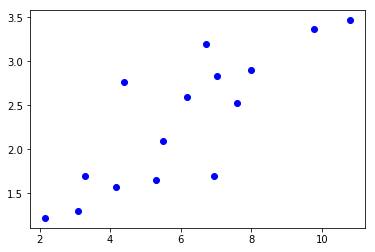

In [10]:
import matplotlib.pyplot as plt
plt.plot(x_train, y_train, 'bo')

#### 转换成 Tensor

In [15]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

#### 定义参数 w 和 b

In [13]:
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化

#### 构建线性回归模型

In [16]:
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

In [17]:
y_ = linear_model(x_train)

#### 在进行参数更新之前的模型输出结果长什么样

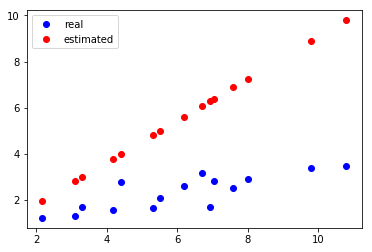

In [18]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

#### 计算误差

In [19]:
def get_loss(y_, y):
    return torch.mean((y_ - y_train) ** 2)

loss = get_loss(y_, y_train)

In [20]:
print(loss)

tensor(12.6034, grad_fn=<MeanBackward0>)


#### 自动求导

In [21]:
loss.backward()

In [22]:
# 查看 w 和 b 的梯度
print(w.grad)
print(b.grad)

tensor([45.7475])
tensor([6.3588])


#### 更新一次参数

In [23]:
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

更新完成参数之后，我们再一次看看模型输出的结果

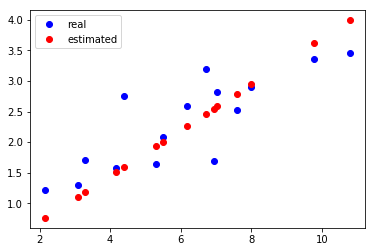

In [32]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

从上面的例子可以看到，更新之后红色的线跑到了蓝色的线下面，没有特别好的拟合蓝色的真实值，所以我们需要在进行几次更新

#### 更新n次参数

In [26]:
for e in range(10): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度
    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    print('epoch: {}, loss: {}'.format(e, loss.data))

epoch: 0, loss: 0.2611602544784546
epoch: 1, loss: 0.2565585970878601
epoch: 2, loss: 0.2560325860977173
epoch: 3, loss: 0.2555842995643616
epoch: 4, loss: 0.2551397383213043
epoch: 5, loss: 0.25469741225242615
epoch: 6, loss: 0.25425729155540466
epoch: 7, loss: 0.2538195252418518
epoch: 8, loss: 0.25338393449783325
epoch: 9, loss: 0.25295063853263855


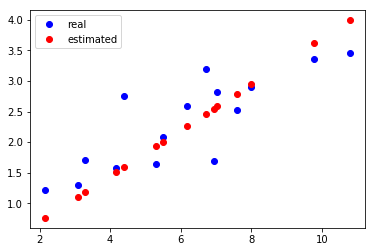

In [29]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

## 多项式回归模型

#### 定义一个多变量函数

In [33]:
w_target = np.array([0.5, 3, 2.4]) # 定义参数
b_target = np.array([0.9]) # 定义参数

f_des = 'y = {:.2f} + {:.2f} * x + {:.2f} * x^2 + {:.2f} * x^3'.format(
    b_target[0], w_target[0], w_target[1], w_target[2]) # 打印出函数的式子

print(f_des)

y = 0.90 + 0.50 * x + 3.00 * x^2 + 2.40 * x^3


#### 画出这个函数的曲线

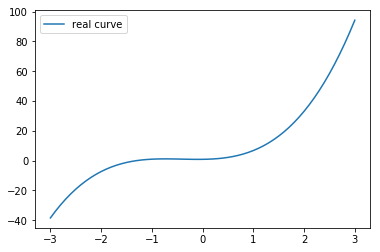

In [34]:
x_sample = np.arange(-3, 3.1, 0.1)
y_sample = b_target[0] + w_target[0] * x_sample + w_target[1] * x_sample ** 2 + w_target[2] * x_sample ** 3

plt.plot(x_sample, y_sample, label='real curve')
plt.legend()

#### 构建数据集，需要 x 和 y，同时是一个三次多项式，所以我们取了 $x,\ x^2, x^3$

In [40]:
# 构建数据 x 和 y
# x 是一个如下矩阵 [x, x^2, x^3]
# y 是函数的结果 [y]

x_train = np.stack([x_sample ** i for i in range(1, 4)], axis=1)
x_train = torch.from_numpy(x_train).float() # 转换成 float tensor

y_train = torch.from_numpy(y_sample).float().unsqueeze(1) # 转化成 float tensor

#### 定义需要优化的参数 $w_i$

In [41]:
# 定义参数和模型
w = Variable(torch.randn(3, 1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

# 将 x 和 y 转换成 Variable
x_train = Variable(x_train)
y_train = Variable(y_train)

def multi_linear(x):
    return torch.mm(x, w) + b

#### 画出更新之前的模型

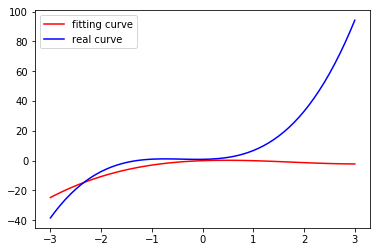

In [43]:
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

#### 计算误差
这里的误差和一元的线性模型的误差是相同的，前面已经定义过了 get_loss

In [44]:
loss = get_loss(y_pred, y_train)
print(loss)

tensor(839.7620, grad_fn=<MeanBackward0>)


#### 自动求导

In [45]:
loss.backward()

In [46]:
# 查看一下 w 和 b 的梯度
print(w.grad)
print(b.grad)

tensor([[ -68.8609],
        [-161.0439],
        [-461.6629]])
tensor([-29.6709])


#### 更新一次参数

In [47]:
w.data = w.data - 0.001 * w.grad.data
b.data = b.data - 0.001 * b.grad.data

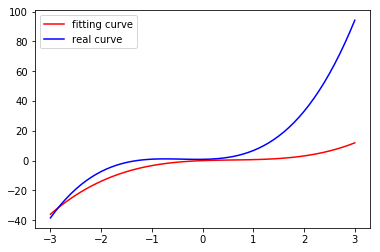

In [48]:
# 画出更新一次之后的模型
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

#### 进行 100 次参数更新

In [50]:
for e in range(100):
    y_pred = multi_linear(x_train)
    loss = get_loss(y_pred, y_train)
    
    w.grad.data.zero_()
    b.grad.data.zero_()
    loss.backward()
    
    # 更新参数
    w.data = w.data - 0.001 * w.grad.data
    b.data = b.data - 0.001 * b.grad.data
    if (e + 1) % 20 == 0:
        print('epoch {}, Loss: {:.5f}'.format(e+1, loss.data))

epoch 20, Loss: 20.89427
epoch 40, Loss: 5.20561
epoch 60, Loss: 1.53168
epoch 80, Loss: 0.66223
epoch 100, Loss: 0.44774


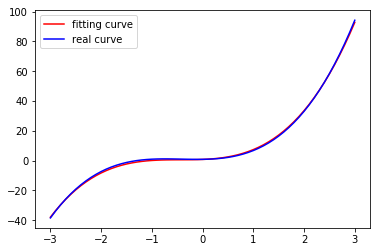

In [51]:
# 画出更新之后的结果
y_pred = multi_linear(x_train)

plt.plot(x_train.data.numpy()[:, 0], y_pred.data.numpy(), label='fitting curve', color='r')
plt.plot(x_train.data.numpy()[:, 0], y_sample, label='real curve', color='b')
plt.legend()

## 逻辑回归

Logistic 回归中，我们的公式是 $y = Sigmoid(w x + b)$

In [3]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 设定随机种子
torch.manual_seed(2017)

#### txt读入

In [1]:
with open('./data.txt', 'r') as f:
    data_list = [i.split('\n')[0].split(',') for i in f.readlines()]
    data = [(float(i[0]), float(i[1]), float(i[2])) for i in data_list]

#### 标准化

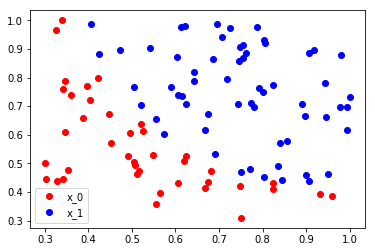

In [5]:
x0_max = max([i[0] for i in data])
x1_max = max([i[1] for i in data])
data = [(i[0]/x0_max, i[1]/x1_max, i[2]) for i in data]

x0 = list(filter(lambda x: x[-1] == 0.0, data)) # 选择第一类的点
x1 = list(filter(lambda x: x[-1] == 1.0, data)) # 选择第二类的点

plot_x0 = [i[0] for i in x0]
plot_y0 = [i[1] for i in x0]
plot_x1 = [i[0] for i in x1]
plot_y1 = [i[1] for i in x1]

plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

#### 数据转换成 NumPy，接着转换到 Tensor 为之后的训练做准备

In [6]:
np_data = np.array(data, dtype='float32') # 转换成 numpy array
x_data = torch.from_numpy(np_data[:, 0:2]) # 转换成 Tensor, 大小是 [100, 2]
y_data = torch.from_numpy(np_data[:, -1]).unsqueeze(1) # 转换成 Tensor，大小是 [100, 1]

#### 定义 sigmoid 函数
$$
f(x) = \frac{1}{1 + e^{-x}}
$$

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

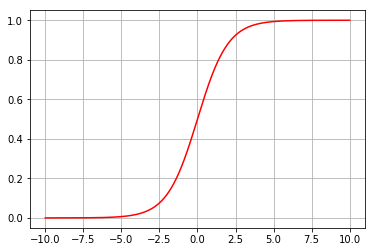

In [8]:
plot_x = np.arange(-10, 10.01, 0.01)
plot_y = sigmoid(plot_x)
plt.grid()
plt.plot(plot_x, plot_y, 'r')

In [9]:
x_data = Variable(x_data)
y_data = Variable(y_data)

#### 导入Sigmoid函数

In [10]:
import torch.nn.functional as F

w = Variable(torch.randn(2, 1), requires_grad=True) 
b = Variable(torch.zeros(1), requires_grad=True)

def logistic_regression(x):
    return F.sigmoid(torch.mm(x, w) + b)

#### 画参数更新之前的结果

In [12]:
plot_x = torch.from_numpy(plot_x)

In [13]:
w0 = w[0].data[0]
w1 = w[1].data[0]
b0 = b.data[0]

plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * plot_x - b0) / w1

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

TypeError: mul(): argument 'other' (position 1) must be Tensor, not numpy.ndarray

#### 计算loss
$$
loss = -(y * log(\hat{y}) + (1 - y) * log(1 - \hat{y}))
$$

In [14]:
def binary_loss(y_pred, y):
    logits = (y * y_pred.clamp(1e-12).log() + (1 - y) * (1 - y_pred).clamp(1e-12).log()).mean()
    return -logits

In [15]:
y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

D:\Anaconda3\lib\site-packages\torch\nn\functional.py:1386: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor(0.6412, grad_fn=<NegBackward>)


梯度下降法得到 loss 之后，我们还是使用梯度下降法更新参数，这里可以使用自动求导来直接得到参数的导数

#### 自动求导并更新参数

In [17]:
loss.backward()
w.data = w.data - 0.1 * w.grad.data
b.data = b.data - 0.1 * b.grad.data

#### 算出一次更新之后的loss

In [18]:
y_pred = logistic_regression(x_data)
loss = binary_loss(y_pred, y_data)
print(loss)

tensor(0.6398, grad_fn=<NegBackward>)


上面的参数更新方式其实是繁琐的重复操作，PyTorch 中的优化器 torch.optim封装了函数来做这件事。

使用 torch.optim 需要另外一个数据类型，就是 nn.Parameter，这个本质上和 Variable 是一样的，只不过 nn.Parameter 默认是要求梯度的，而 Variable 默认是不求梯度的

使用 torch.optim.SGD 可以使用梯度下降法来更新参数，PyTorch 中的优化器有更多的优化算法，在本章后面的课程我们会更加详细的介绍

将参数 w 和 b 放到 torch.optim.SGD 中之后，说明一下学习率的大小，就可以使用 optimizer.step() 来更新参数了，比如下面我们将参数传入优化器，学习率设置为 1.0

#### 使用 torch.optim 更新参数

In [19]:
from torch import nn
w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.zeros(1))

def logistic_regression(x):
    return F.sigmoid(torch.mm(x, w) + b)

optimizer = torch.optim.SGD([w, b], lr=1.)

#### 进行 1000 次更新

In [27]:
import time

start = time.time()
for e in range(1000):
    # 前向传播
    y_pred = logistic_regression(x_data)
    loss = binary_loss(y_pred, y_data) # 计算 loss
    # 反向传播
    optimizer.zero_grad() # 使用优化器将梯度归 0
    loss.backward()
    optimizer.step() # 使用优化器来更新参数
    # 计算正确率
    mask = y_pred.ge(0.5).float()
    acc = (mask == y_data).sum().data / y_data.shape[0]
    if (e + 1) % 200 == 0:
        print('epoch: {}, Loss: {:.5f}, Acc: {:.5f}'.format(e+1, loss.data, acc))
during = time.time() - start
print()
print('During Time: {:.3f} s'.format(during))

epoch: 200, Loss: 0.27046, Acc: 0.00000
epoch: 400, Loss: 0.25743, Acc: 0.00000
epoch: 600, Loss: 0.24815, Acc: 0.00000
epoch: 800, Loss: 0.24121, Acc: 0.00000
epoch: 1000, Loss: 0.23583, Acc: 0.00000

During Time: 0.783 s


In [33]:
# 画出更新之后的结果
w0 = w[0].data
w1 = w[1].data
b0 = b.data
plot_x = torch.from_numpy(plot_x)
plot_x = np.arange(0.2, 1, 0.01)
plot_y = (-w0 * plot_x - b0) / w1

plt.plot(plot_x, plot_y, 'g', label='cutting line')
plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

RuntimeError: expected backend CPU and dtype Double but got backend CPU and dtype Float

### Pytorch封装包的版本

In [3]:
import torch
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt

#### txt读入

In [1]:
with open('./data.txt', 'r') as f:
    data_list = [i.split('\n')[0].split(',') for i in f.readlines()]
    data = [(float(i[0]), float(i[1]), float(i[2])) for i in data_list]

#### 标准化

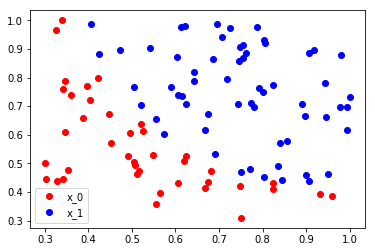

In [4]:
x0_max = max([i[0] for i in data])
x1_max = max([i[1] for i in data])
data = [(i[0]/x0_max, i[1]/x1_max, i[2]) for i in data]

x0 = list(filter(lambda x: x[-1] == 0.0, data)) # 选择第一类的点
x1 = list(filter(lambda x: x[-1] == 1.0, data)) # 选择第二类的点

plot_x0 = [i[0] for i in x0]
plot_y0 = [i[1] for i in x0]
plot_x1 = [i[0] for i in x1]
plot_y1 = [i[1] for i in x1]

plt.plot(plot_x0, plot_y0, 'ro', label='x_0')
plt.plot(plot_x1, plot_y1, 'bo', label='x_1')
plt.legend(loc='best')

#### 数据转换成 NumPy，接着转换到 Tensor 为之后的训练做准备

In [5]:
np_data = np.array(data, dtype='float32') # 转换成 numpy array
x_data = torch.from_numpy(np_data[:, 0:2]) # 转换成 Tensor, 大小是 [100, 2]
y_data = torch.from_numpy(np_data[:, -1]).unsqueeze(1) # 转换成 Tensor，大小是 [100, 1]

In [7]:
from torch import nn

criterion = nn.BCEWithLogitsLoss() # 将 sigmoid 和 loss 写在一层，有更快的速度、更好的稳定性

w = nn.Parameter(torch.randn(2, 1))
b = nn.Parameter(torch.zeros(1))

def logistic_reg(x):
    return torch.mm(x, w) + b

optimizer = torch.optim.SGD([w, b], 1.)

In [8]:
y_pred = logistic_reg(x_data)
loss = criterion(y_pred, y_data)
print(loss.data)

tensor(0.6931)


#### 进行 1000 次更新

In [11]:
import time

start = time.time()
for e in range(1000):
    # 前向传播
    y_pred = logistic_reg(x_data)
    loss = criterion(y_pred, y_data)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # 计算正确率
    mask = y_pred.ge(0.5).float()
    acc = (mask == y_data).sum().data / y_data.shape[0]
    if (e + 1) % 200 == 0:
        print('epoch: {}, Loss: {:.5f}, Acc: {:.5f}'.format(e+1, loss.data, acc))

during = time.time() - start
print()
print('During Time: {:.3f} s'.format(during))

epoch: 200, Loss: 0.38774, Acc: 0.00000
epoch: 400, Loss: 0.32081, Acc: 0.00000
epoch: 600, Loss: 0.28859, Acc: 0.00000
epoch: 800, Loss: 0.26947, Acc: 0.00000
epoch: 1000, Loss: 0.25675, Acc: 0.00000

During Time: 0.550 s


## 多层神经网络

In [1]:
import torch
import numpy as np
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_decision_boundary(model, x, y):
    # Set min and max values and give it some padding
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them生成一个点间网格，它们之间的距离为h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples预测整个网格的函数值
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

In [3]:
np.random.seed(1)
m = 400 # 样本数量
N = int(m/2) # 每一类的点的个数
D = 2 # 维度
x = np.zeros((m, D))
y = np.zeros((m, 1), dtype='uint8') # label 向量，0 表示红色，1 表示蓝色
a = 4

for j in range(2):
    ix = range(N*j,N*(j+1))
    t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
    r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
    x[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

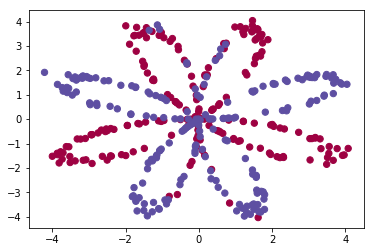

In [4]:
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), s=40, cmap=plt.cm.Spectral)

#### 定义两层神经网络的参数

In [5]:
w1 = nn.Parameter(torch.randn(2, 4) * 0.01) # 隐藏层神经元个数 2
b1 = nn.Parameter(torch.zeros(4))

w2 = nn.Parameter(torch.randn(4, 1) * 0.01)
b2 = nn.Parameter(torch.zeros(1))

#### 定义模型

In [6]:
def two_network(x):
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1) # 使用 PyTorch 自带的 tanh 激活函数
    x2 = torch.mm(x1, w2) + b2
    return x2

optimizer = torch.optim.SGD([w1, w2, b1, b2], 1.)

criterion = nn.BCEWithLogitsLoss()

#### 训练 10000 次

In [26]:
for e in range(10000):
    mmm = torch.from_numpy(x)
    mmm= mmm.double()
    out = two_network(Variable(mmm))
    loss = criterion(out, Variable(y))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

RuntimeError: Expected object of scalar type Double but got scalar type Float for argument #2 'mat2'

In [ ]:
def plot_network(x):
    x = Variable(torch.from_numpy(x).float())
    x1 = torch.mm(x, w1) + b1
    x1 = F.tanh(x1)
    x2 = torch.mm(x1, w2) + b2
    out = F.sigmoid(x2)
    out = (out > 0.5) * 1
    return out.data.numpy()

In [ ]:
plot_decision_boundary(lambda x: plot_network(x), x.numpy(), y.numpy())
plt.title('2 layer network')

## Sequential 和 Module

Sequential 允许我们构建序列化的模块，而 Module 是一种更加灵活的模型定义方式

### Sequential

In [18]:
seq_net = nn.Sequential(
    nn.Linear(2, 4), # PyTorch 中的线性层，wx + b
    nn.Tanh(),
    nn.Linear(4, 1)
)

In [19]:
# 序列模块可以通过索引访问每一层
seq_net[0] # 第一层

Linear(in_features=2, out_features=4, bias=True)

In [20]:
# 打印出第一层的权重
w0 = seq_net[0].weight
print(w0)

Parameter containing:
tensor([[ 0.1046, -0.3509],
        [-0.0241,  0.1256],
        [ 0.3408, -0.2179],
        [ 0.2949, -0.3454]], requires_grad=True)


In [21]:
# 通过 parameters 可以取得模型的参数
param = seq_net.parameters()

# 定义优化器
optim = torch.optim.SGD(param, 1.)

In [47]:
# 我们训练 10000 次
for e in range(10000):
    xx = torch.from_numpy(x)
    #xx = torch.FloatTensor(xx)
    xxx = xx.type(torch.FloatTensor)
    out = seq_net(Variable(xxx))
    #yy = torch.from_numpy(y)
    loss = criterion(out, Variable(y))
    optim.zero_grad()
    loss.backward()
    optim.step()
    if (e + 1) % 1000 == 0:
        print('epoch: {}, loss: {}'.format(e+1, loss.data[0]))

TypeError: Variable data has to be a tensor, but got numpy.ndarray

In [27]:
a = np.array([1,2,3,4,5,6,7,8,9],dtype='float32');
b = a.astype(np.float64)

In [28]:
type(b)

numpy.ndarray

In [29]:
b

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [30]:
a

array([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [31]:
c = a.astype(np.double)

In [32]:
c

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [33]:
type(c)

numpy.ndarray

In [4]:
class CNN (nn.Module):
    def __init__ (self):
        super(CNN, self).__init__()
        self.linear = nn.Linear(1, 1)
  
    def forward (self, x):
        out = self.linear(x)
        return out

In [5]:
if torch.cuda.is_available():
    model = CNN().cuda()
else:
    model = CNN()

In [6]:
cirtirion = nn.MSELoss()
optimizer = optim.SGD (model.parameters(), lr = 1e-3)

NameError: name 'optim' is not defined